# Superstore Sales & Profit EDA (Python)

Notebook ini berisi proses **Exploratory Data Analysis (EDA)** pada dataset *Superstore*  
untuk menganalisis **tren penjualan, profitabilitas, serta performa bisnis**.

Analisis dilakukan menggunakan **Python** dengan tahapan:
1. Load dan eksplorasi data
2. Data cleaning dan transformasi
3. Analisis tren dan performa bisnis
4. Visualisasi data
5. Penarikan insight dan rekomendasi bisnis

Tujuan dari analisis ini adalah untuk menghasilkan **insight berbasis data**
yang dapat mendukung pengambilan keputusan bisnis.


In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Superstore.csv", encoding="latin1")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [100]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data Cleaning Summary
- Kolom tanggal berhasil dikonversi ke format datetime.
- Dataset tidak memiliki duplikasi data.
- Dataset tidak memiliki missing value pada seluruh kolom, sehingga tidak diperlukan proses imputasi atau penghapusan data.



In [101]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df[['Order Date', 'Ship Date']].head()


/tmp/ipython-input-183405955.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipython-input-183405955.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


,Order Date,Ship Date
0,2016-08-11,2016-11-11
1,2016-08-11,2016-11-11
2,2016-12-06,2016-06-16
3,2015-11-10,2015-10-18
4,2015-11-10,2015-10-18


In [102]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()

df[['Order Date', 'Order Year', 'Order Month', 'Order Month Name']].head()


,Order Date,Order Year,Order Month,Order Month Name
0,2016-08-11,2016,8,August
1,2016-08-11,2016,8,August
2,2016-12-06,2016,12,December
3,2015-11-10,2015,11,November
4,2015-11-10,2015,11,November


In [103]:
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [104]:
df.duplicated().sum()


np.int64(0)

### Insight: Category & Sub-Category Performance
- Category Technology menghasilkan profit tertinggi dibandingkan kategori lainnya.
- Beberapa sub-category memiliki penjualan tinggi namun profit rendah, yang mengindikasikan margin keuntungan yang kecil.
- Sub-category tertentu berkontribusi besar terhadap profit dan dapat menjadi fokus strategi penjualan.


In [105]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_summary


,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


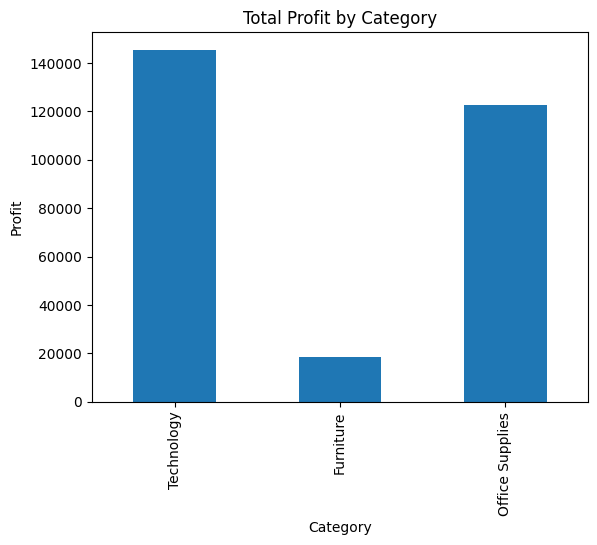

In [106]:
category_summary['Profit'].plot(kind='bar')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()


In [107]:
subcat_summary = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
subcat_summary.head(10)


,Sales,Profit
Sub-Category,,
Copiers,149528.030,55617.8249
Phones,330007.054,44515.7306
Accessories,167380.318,41936.6357
Paper,78479.206,34053.5693
Binders,203412.733,30221.7633
Chairs,328449.103,26590.1663
Storage,223843.608,21278.8264
Appliances,107532.161,18138.0054
Furnishings,91705.164,13059.1436


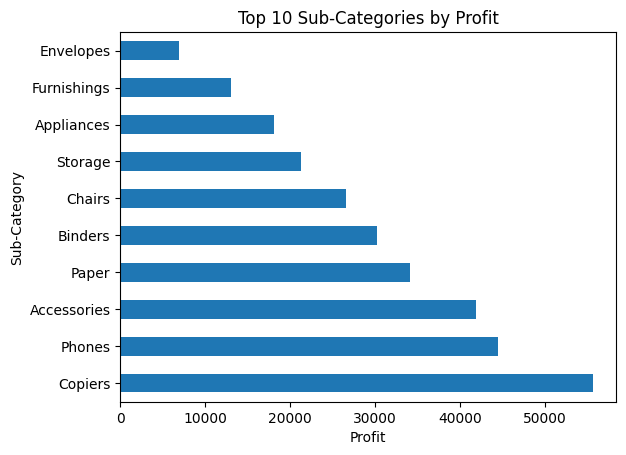

In [108]:
subcat_summary['Profit'].head(10).plot(kind='barh')
plt.title('Top 10 Sub-Categories by Profit')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()


### Insight: Discount vs Profit
- Profit rata-rata cenderung menurun seiring dengan meningkatnya tingkat diskon.
- Diskon tinggi tidak selalu meningkatkan profit, bahkan pada beberapa level diskon menghasilkan profit negatif.
- Hal ini menunjukkan bahwa strategi diskon perlu dikontrol agar tidak mengurangi margin keuntungan.


In [109]:
discount_profit = df.groupby('Discount')[['Sales', 'Profit']].mean()
discount_profit


,Sales,Profit
Discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


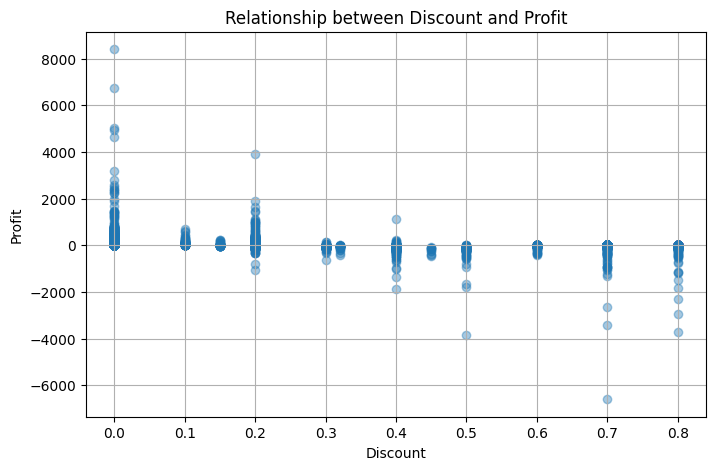

In [110]:
plt.figure(figsize=(8,5))
plt.scatter(df['Discount'], df['Profit'], alpha=0.4)
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


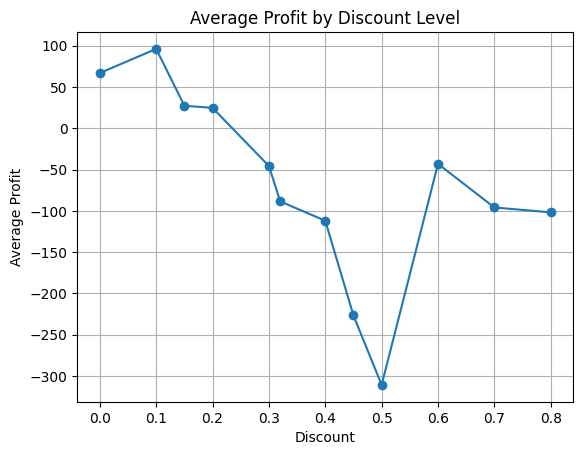

In [111]:
discount_profit['Profit'].plot(kind='line', marker='o')
plt.title('Average Profit by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()


### Insight: Regional Performance
- Region dengan profit tertinggi menunjukkan potensi pasar yang kuat.
- Region dengan profit rendah dapat menjadi fokus evaluasi strategi penjualan dan distribusi.


In [112]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit


,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


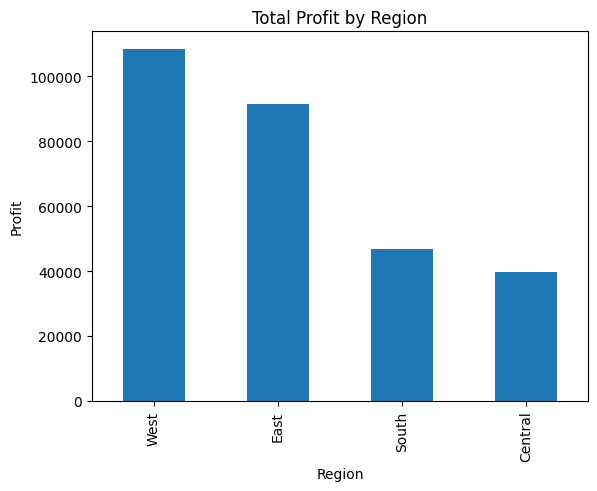

In [113]:
region_profit.plot(kind='bar')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()


### Insight: Product Performance
- Beberapa produk berkontribusi signifikan terhadap total profit.
- Fokus pada produk dengan profit tinggi dapat meningkatkan efisiensi strategi penjualan.


In [114]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products


,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


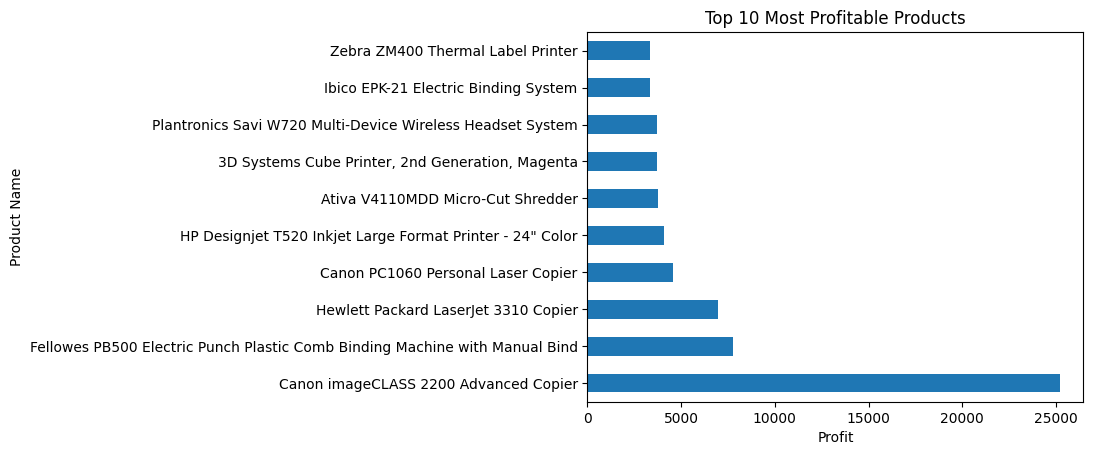

In [115]:
top_products.plot(kind='barh')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.show()


## Business Insights & Recommendations
- Optimalkan strategi diskon dengan membatasi diskon tinggi pada produk yang memiliki margin rendah.
- Fokus pada kategori dan sub-category dengan kontribusi profit tertinggi.
- Perkuat strategi penjualan di region dengan performa profit terbaik.
- Evaluasi produk dengan penjualan tinggi namun profit rendah untuk perbaikan harga atau biaya.
